SENTIMENTAL ANALYSIS ON TWEETS BY MS. SANJNA BALI (GU-2022-4239) FROM (B.TECH CSE 3A)

importing the modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

LOADING THE DATA SET

In [36]:
tweet_data = pd.read_csv('Axisbank tweets.csv')

In [37]:
tweet_data

,Tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...
...,...
1117,#BusinessNews: Equity benchmark #Sensex tumble...
1118,#BusinessNews: Equity benchmark #Sensex jumped...
1119,RT @Ashima_FnO: #AXISBANK \n trend breakout......
1120,#AXISBANK \n trend breakout.... https://t.co/W...


In [38]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1122 non-null   object
dtypes: object(1)
memory usage: 8.9+ KB


In [39]:
tweet_data.describe()

,Tweet
count,1122
unique,973
top,RT @CSCegov_: Launch of Axis Bank BCs through ...
freq,15


In [40]:
tweet_data.shape

(1122, 1)

In [41]:
tweet_data.head()

,Tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...


PREPROCESSING THE DATA

In [42]:
#remove patterns in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [43]:
#remove twitter handles
tweet_data['clean_tweet']= np.vectorize(remove_pattern)(tweet_data['Tweet'], "@[\w]*")

In [44]:
tweet_data.head()

,Tweet,clean_tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,RT : #AxisBank \n\nSeems big move coming up ??...


In [45]:
#remove special characters ,numbers and punctuations
tweet_data['clean_tweet']= tweet_data['clean_tweet'].str.replace("[^a-zA-z#]"," ")
tweet_data.head()

,Tweet,clean_tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT : please teach this bank How to solve c...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,RT : #AxisBank \n\nSeems big move coming up ??...


In [46]:
#remove short words
tweet_data['clean_tweet']= tweet_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweet_data.head()

,Tweet,clean_tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,please teach this bank solve customer issues.....
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,please teach this bank solve customer issues.....
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,please teach this bank solve customer issues.....
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,please teach this bank solve customer issues.....
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,#AxisBank Seems move coming Looks bullish here...


In [47]:
#individual words considered as tokens
tokenized_tweet= tweet_data['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [please, teach, this, bank, solve, customer, i...
1    [please, teach, this, bank, solve, customer, i...
2    [please, teach, this, bank, solve, customer, i...
3    [please, teach, this, bank, solve, customer, i...
4    [#AxisBank, Seems, move, coming, Looks, bullis...
Name: clean_tweet, dtype: object

In [48]:
#stem the words
import nltk
from nltk.stem.porter import PorterStemmer
Stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [Stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [pleas, teach, thi, bank, solv, custom, issues...
1    [pleas, teach, thi, bank, solv, custom, issues...
2    [pleas, teach, thi, bank, solv, custom, issues...
3    [pleas, teach, thi, bank, solv, custom, issues...
4    [#axisbank, seem, move, come, look, bullish, h...
Name: clean_tweet, dtype: object

In [49]:
#combine into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

tweet_data['clean_tweet'] = tokenized_tweet
tweet_data.head()

,Tweet,clean_tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,pleas teach thi bank solv custom issues.. #axi...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,pleas teach thi bank solv custom issues.. #axi...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,pleas teach thi bank solv custom issues.. #axi...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,pleas teach thi bank solv custom issues.. #axi...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,#axisbank seem move come look bullish here 785...


EXPLORATORY DATA ANALYSIS

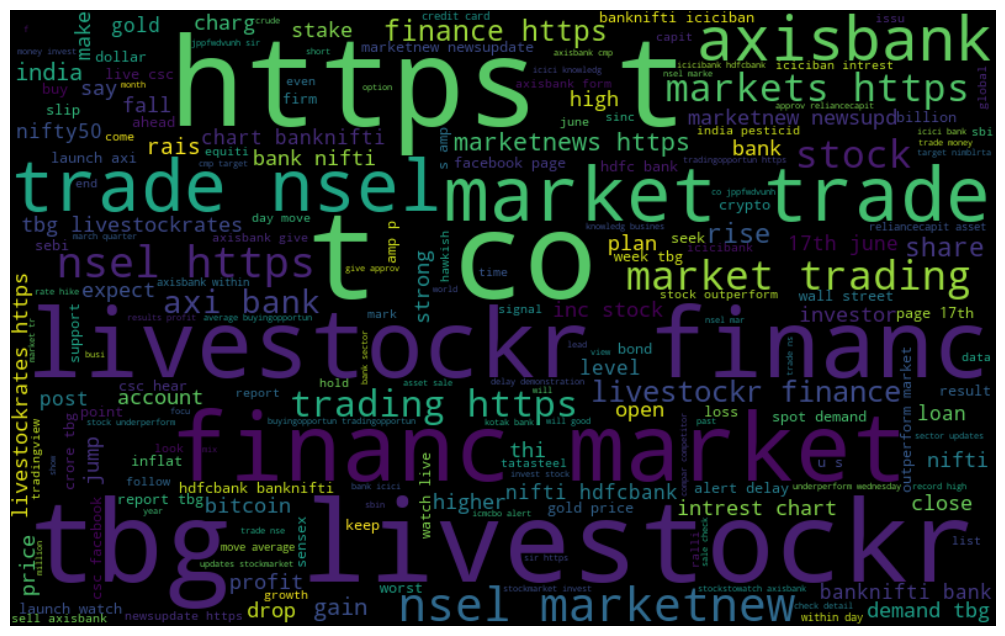

In [51]:
#visualize the frequent word
all_words =" ".join([sentence for sentence in tweet_data['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [70]:
#Sentiment Analysis Labels Based on Polarity
from textblob import TextBlob

X = tweet_data['clean_tweet']

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assign labels based on sentiment polarity
    if analysis.sentiment.polarity > 0:
        return '1'
    elif analysis.sentiment.polarity < 0:
        return '-1'
    else:
        return '0'

# Create a new 'label' column based on sentiment
tweet_data['label'] = X.apply(get_sentiment)

In [71]:
tweet_data.head()

,Tweet,clean_tweet,label
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,0
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,0
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,0
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,0
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,RT @prashant280294: #AxisBank \n\nSeems big mo...,0


In [81]:
# Count the occurrences of each label
label_counts = tweet_data['label'].value_counts()
# Display the counts
print("Label Counts:")
print(label_counts)

Label Counts:
label
0     658
1     288
-1    176
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment Distribution')

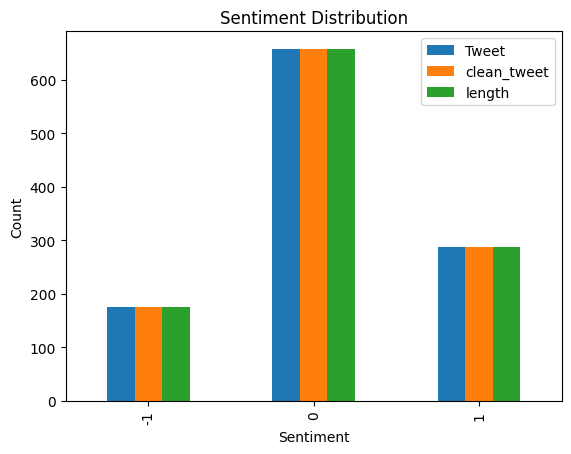

In [184]:
# The distribution of sentiments
tweet_data.groupby('label').count().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

MODEL TRAINING

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [129]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", tweet_data['clean_tweet'][0])
print("\nProcessed tweet ->", tweet_to_words(tweet_data['clean_tweet'][0]))


Original tweet -> RT @GarimaS38018144: @kimansingh17 @HDFC_Bank @ICICIBank please teach this bank @AxisBankSupport How to solve customer issues..
#axisbank #?

Processed tweet -> ['rt', 'garimas38018144', 'kimansingh17', 'hdfc', 'bank', 'icicibank', 'pleas', 'teach', 'thi', 'bank', 'axisbanksupport', 'how', 'to', 'solv', 'custom', 'issu', 'axisbank']


In [130]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, tweet_data['clean_tweet']))

In [131]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(tweet_data['label'])

In [132]:
print(X[0])
print(Y[0])

['rt', 'garimas38018144', 'kimansingh17', 'hdfc', 'bank', 'icicibank', 'pleas', 'teach', 'thi', 'bank', 'axisbanksupport', 'how', 'to', 'solv', 'custom', 'issu', 'axisbank']
1


In [149]:
X = tweet_data['clean_tweet']
y = tweet_data['label']

In [178]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [180]:
# Train an SVM classifier
model = SVC(kernel='linear')  
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [181]:
# Predict sentiments on the test set
y_pred = model.predict(X_test_tfidf)

In [182]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [183]:
print("Accuracy: {}%".format(int(round(accuracy*100))))

Accuracy: 87%
